In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import tqdm

import os
top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM/python')

import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa
#from scipy.io import FortranFile as ff
import astropy.units as u
from astropy.constants import M_sun


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

In [20]:
# Create directory containing the snapshots
snaps = {}
i_snap = 223; f_snap = 670 
for io in range(i_snap, f_snap, 100):
    sn = dis.snapshot(io,'my_core_13restart')
    snaps[io] = sn
    print(io, sn.time)

223 2e-06
323 0.0002019999999999996
423 0.0004019999999999991
523 0.0006020000000000016
623 0.0008020000000000065


In [21]:
w = 100
max_level = 20
ds = 0.5**max_level

size = w * ds
extent = size * sn.scaling.l / sn.cgs.au; print(extent,'AU')
cgs_time = sn.scaling.t / sn.cgs.yr
time = np.zeros(len(snaps))

x = np.linspace(-extent/2, extent/2, w)
y = np.linspace(-extent/2, extent/2, w)
z = np.linspace(-extent/2, extent/2, w)
XX, YY, ZZ = np.meshgrid(x, y, x)
distances = np.sqrt(XX**2 + YY**2 + ZZ**2)
dist_star = np.linspace(1, 70, 20)

78.69088076015207 AU


0.6883666846915449 68.14830178446381


array([ 1.        ,  4.63157895,  8.26315789, 11.89473684, 15.52631579,
       19.15789474, 22.78947368, 26.42105263, 30.05263158, 33.68421053,
       37.31578947, 40.94736842, 44.57894737, 48.21052632, 51.84210526,
       55.47368421, 59.10526316, 62.73684211, 66.36842105, 70.        ])

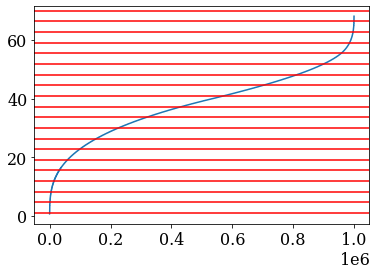

In [22]:
plt.plot(np.sort(distances.flatten()))
print(distances.min(),distances.max())
for r in dist_star:
    plt.axhline(r, c = 'r')
dist_star

In [23]:
mean_B = {}
for i, s in (enumerate(snaps.keys())):
    try:
        star_pos = snaps[s].sinks[13][0].position
    except:
        pass
    mag_B = dse.amr2raw(snaps[s], center = star_pos, width = w, verbose = 0, lmax = max_level, lmin = 15, ivs = 'bx**2+by**2+bz**2') 

    time[i] = snaps[s].time
    print(snaps[s].time)
    prev_r = 0; mean = np.zeros_like(dist_star)
    
    for i, r in enumerate(dist_star):
        mask = np.ma.masked_values(((distances <= r) & (distances > prev_r)), distances)
     
        mean[i] = np.nanmean(mag_B[mask]**0.5 * sn.scaling.b )
        prev_r = r
    mean_B[s] = mean
    print(f'Done with snapshot{s}')

2e-06
Done with snapshot223
0.0002019999999999996
Done with snapshot323
0.0004019999999999991
Done with snapshot423
0.0006020000000000016
Done with snapshot523
0.0008020000000000065
Done with snapshot623


In [24]:
dist_star2 = dist_star - 0.5 * np.diff(dist_star)[0]
dist_star2[0] = 0.5
dist_star2

array([ 0.5       ,  2.81578947,  6.44736842, 10.07894737, 13.71052632,
       17.34210526, 20.97368421, 24.60526316, 28.23684211, 31.86842105,
       35.5       , 39.13157895, 42.76315789, 46.39473684, 50.02631579,
       53.65789474, 57.28947368, 60.92105263, 64.55263158, 68.18421053])

223
323
423
523
623


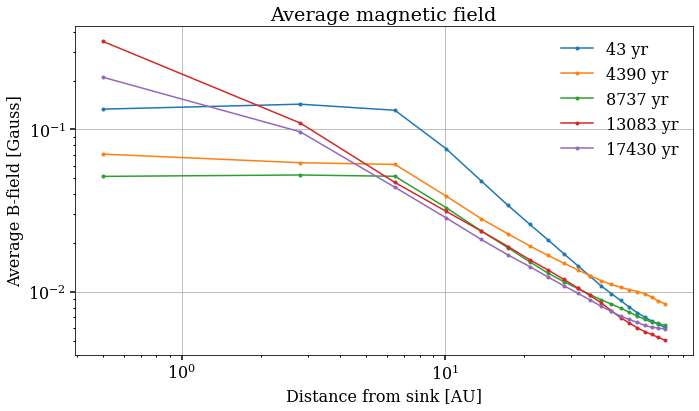

In [25]:
fig, axs = plt.subplots(figsize = (10,6))
plt.grid()
axs.tick_params(width = 1.5, which = 'major', length = 5)
axs.tick_params(width = 1, which = 'minor')

for i, key in enumerate(snaps.keys()):
    print(key)
    axs.loglog(dist_star2, mean_B[key] , label = f'{time[i] * cgs_time:2.0f} yr', marker = '.')


axs.set(ylabel = 'Average B-field [Gauss]', xlabel = 'Distance from sink [AU]', title = 'Average magnetic field')
plt.legend(frameon = False)
plt.tight_layout()